In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import loguniform
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import torch
from torch.utils.data import DataLoader, TensorDataset

In [101]:
raw_train_data = pd.read_csv('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\raw-data\\train.csv')
raw_test_data = pd.read_csv('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\raw-data\\test.csv')
raw_valid_data = pd.read_csv('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\raw-data\\valid.csv')
tfidf_train_data = np.load('C:\\Users\\xu741\Desktop\\IML\\a1\\a3\\tfidf-data\\train-tfidf.npy')
tfidf_test_data = np.load('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\tfidf-data\\test-tfidf.npy')
tfidf_valid_data = np.load('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\tfidf-data\\valid-tfidf.npy')
embedding_train_data = np.load('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\embeddings-data\\train-embeddings.npy')
embedding_test_data = np.load('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\embeddings-data\\test-embeddings.npy')
embedding_valid_data = np.load('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\embeddings-data\\valid-embeddings.npy')

In [102]:
# # repalce nan with mean value 
# raw_train_data.fillna(raw_train_data.mean(),inplace=True)

# # convert requirements and role column into bag-of-words representation 
# raw_train_data['requirements_and_role'].fillna('', inplace=True)

# sepearte labeled data and unlableled
labeled_tfidf_train_data, unlabeled_tfidf_train_data = tfidf_train_data[:8000], tfidf_train_data[-5902:]
labeled_embedding_train_data, unlabeled_embedding_train_data = embedding_train_data[:8000], embedding_train_data[-5902:]


bins = [-float('inf'), 0, 1, 2, 3, 4, 5, 6, 7, 8, float('inf')]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

raw_train_data['salary_bin_cat'] = pd.cut(raw_train_data['salary_bin'], bins=bins, labels=labels)
raw_valid_data['salary_bin_cat'] = pd.cut(raw_valid_data['salary_bin'], bins=bins, labels=labels)

# get categorical data 
salary_bin_raw_train = raw_train_data['salary_bin_cat']
salary_bin_raw_valid = raw_valid_data['salary_bin_cat']

# get Target labels and untarget labels for train data 
labeled_train_data_y = salary_bin_raw_train[:8000]
unlabeled_train_data_y = salary_bin_raw_train[-5902:]

X_valid_raw = raw_valid_data['requirements_and_role']
y_valid = salary_bin_raw_valid



Train data
and use accuracy to measure the score

In [63]:
lr = LogisticRegression(max_iter=5000)
knn = KNeighborsClassifier()
gnb = GaussianNB()
rf = RandomForestClassifier()
svc = SVC()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# train data using tfidf dataset 
X_train_tfidf, y_train_tfidf = labeled_tfidf_train_data, labeled_train_data_y

accuracies_lr_tfidf, accuracies_gnb_tfidf, accuracies_knn_tfidf, accuracies_rf_tfidf, accuracies_svc_tfidf = [],[],[],[],[]
for i, (train_index, test_index) in enumerate(kf.split(X_train_tfidf)):

    X_train, X_test = X_train_tfidf[train_index], X_train_tfidf[test_index]
    y_train, y_test = y_train_tfidf[train_index], y_train_tfidf[test_index]

    lr.fit(X_train, y_train)
    gnb.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    rf.fit(X_train,y_train)
    svc.fit(X_train, y_train)

    y_pred_lr = lr.predict(X_test)
    y_pred_gnb = gnb.predict(X_test)
    y_pred_knn = knn.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    y_pred_svc = svc.predict(X_test)

    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    accuracy_svc = accuracy_score(y_test, y_pred_svc)

    accuracies_lr_tfidf.append(accuracy_lr)
    accuracies_gnb_tfidf.append(accuracy_gnb)
    accuracies_knn_tfidf.append(accuracy_knn)
    accuracies_rf_tfidf.append(accuracy_rf)
    accuracies_svc_tfidf.append(accuracy_svc)

avg_accuracy_tfidf_lr = np.mean(accuracies_lr_tfidf)
avg_accuracy_tfidf_gnb = np.mean(accuracies_gnb_tfidf)
avg_accuracy_tfidf_knn = np.mean(accuracies_knn_tfidf)
avg_accuracy_tfidf_rf = np.mean(accuracies_rf_tfidf)
avg_accuracy_tfidf_svc = np.mean(accuracies_svc_tfidf)




Print all import information

Logistic Regression (TF-IDF): 0.2316
Multinomial Naive Bayes (TF-IDF): 0.2256
K-Nearest Neighbors (TF-IDF): 0.1575
Random Forest (TF-IDF): 0.2401
Support Vector Machine (TF-IDF): 0.2495


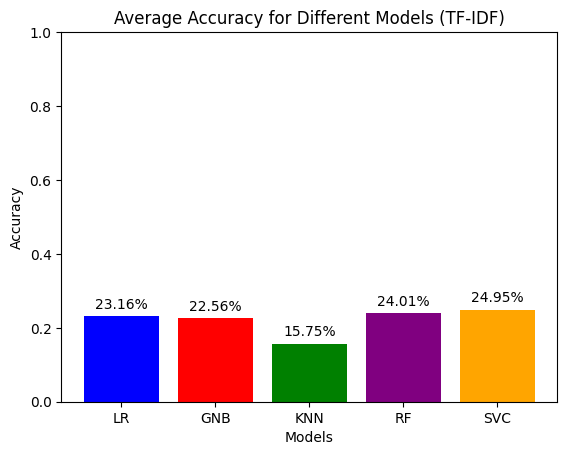

In [64]:
# Print out the average accuracy for each model
print(f"Logistic Regression (TF-IDF): {avg_accuracy_tfidf_lr:.4f}")
print(f"Multinomial Naive Bayes (TF-IDF): {avg_accuracy_tfidf_gnb:.4f}")
print(f"K-Nearest Neighbors (TF-IDF): {avg_accuracy_tfidf_knn:.4f}")
print(f"Random Forest (TF-IDF): {avg_accuracy_tfidf_rf:.4f}")
print(f"Support Vector Machine (TF-IDF): {avg_accuracy_tfidf_svc:.4f}")

# Plot the average accuracy for each model
models = ['LR', 'GNB', 'KNN', 'RF', 'SVC']
accuracies = [avg_accuracy_tfidf_lr, avg_accuracy_tfidf_gnb, avg_accuracy_tfidf_knn, avg_accuracy_tfidf_rf, avg_accuracy_tfidf_svc]

plt.bar(models, accuracies, color=['blue', 'red', 'green', 'purple', 'orange'])
plt.title('Average Accuracy for Different Models (TF-IDF)')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
for i, acc in enumerate(accuracies):
    plt.text(i, acc+0.02, f"{acc*100:.2f}%", ha='center')
plt.show()

Train the same model with embedding data

In [65]:
import joblib

lr = LogisticRegression(max_iter=5000)
knn = KNeighborsClassifier()
gnb = GaussianNB()
rf = RandomForestClassifier()
svc = SVC()


X_train_embedding, y_train_embedding = labeled_embedding_train_data, labeled_train_data_y

models = {'lr': lr, 'gnb': gnb, 'knn': knn, 'rf': rf, 'svc': svc}
accuracies = {'lr': [], 'gnb': [], 'knn': [], 'rf': [], 'svc': []}

for i, (train_index, test_index) in enumerate(kf.split(X_train_embedding)):

    X_train, X_test = X_train_embedding[train_index], X_train_embedding[test_index]
    y_train, y_test = y_train_embedding[train_index], y_train_embedding[test_index]

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[model_name].append(accuracy)
        
# save the trained models
for model_name, model in models.items():
    joblib.dump(model, f'{model_name}.joblib')


avg_accuracy_embedding_lr = np.mean(accuracies['lr'])
avg_accuracy_embedding_gnb = np.mean(accuracies['gnb'])
avg_accuracy_embedding_knn = np.mean(accuracies['knn'])
avg_accuracy_embedding_rf = np.mean(accuracies['rf'])
avg_accuracy_embedding_svc = np.mean(accuracies['svc'])

Average accuracies:
Logistic Regression:  0.246125
Gaussian Naive Bayes:  0.229
K-Nearest Neighbors:  0.200625
Random Forest:  0.225
Support Vector Machine:  0.252


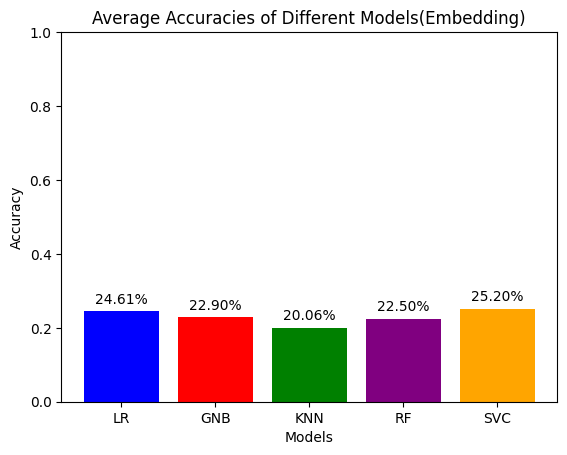

In [66]:
# Print average accuracies
print("Average accuracies:")
print("Logistic Regression: ", avg_accuracy_embedding_lr)
print("Gaussian Naive Bayes: ", avg_accuracy_embedding_gnb)
print("K-Nearest Neighbors: ", avg_accuracy_embedding_knn)
print("Random Forest: ", avg_accuracy_embedding_rf)
print("Support Vector Machine: ", avg_accuracy_embedding_svc)

# Create a bar plot
models = ['LR', 'GNB', 'KNN', 'RF', 'SVC']
accuracies = [avg_accuracy_embedding_lr, avg_accuracy_embedding_gnb, avg_accuracy_embedding_knn, 
              avg_accuracy_embedding_rf, avg_accuracy_embedding_svc]
plt.bar(models, accuracies, color=['blue', 'red', 'green', 'purple', 'orange'])
plt.title('Average Accuracies of Different Models(Embedding)')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0,1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc+0.02, f"{acc*100:.2f}%", ha='center')
plt.show()

Embedding data is performing better, stick with embedding data do optimization with random search

In [67]:
models = {
    'lr': {
        'estimator': joblib.load('lr.joblib'),
        'param_grid': {
            'penalty': ['l2','none'],
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
            'max_iter': [50, 100, 200, 500, 1000]
        }
    },
    'gnb': {
        'estimator': joblib.load('gnb.joblib'),
        'param_grid': {
            'var_smoothing': np.logspace(-15, -5, 200)
        }
    },
    'knn': {
        'estimator': joblib.load('knn.joblib'),
        'param_grid': {
            'n_neighbors': range(1,20),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        }
    },
    'rf': {
        'estimator': joblib.load('rf.joblib'),
        'param_grid': {
            'n_estimators': [50, 100, 200, 500, 1000],
            'max_features': ['sqrt', 'log2'],
            'max_depth': [None, 5, 10, 20, 30],
            'min_samples_leaf': [1, 2, 4, 8]
        }
    },
    'svc': {
        'estimator': joblib.load('svc.joblib'),
        'param_grid': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'kernel': ['linear','poly', 'rbf', 'sigmoid'],
            'degree': [0, 1, 2, 3, 4, 5, 6],
            'probability': [True]
        }
    }
}


In [68]:
from sklearn.model_selection import RandomizedSearchCV

X_valid_embedding = embedding_valid_data

for model_name, model_data in models.items():
    rs = RandomizedSearchCV(
        model_data['estimator'], 
        param_distributions=model_data['param_grid'], 
        cv=kf, 
        n_iter=20, 
        n_jobs=-1, 
        random_state=42
    )
    rs.fit(X_valid_embedding, y_valid)
    print(f"Best parameters for {model_name}: {rs.best_params_}")
    print(f"Best CV score for {model_name}: {rs.best_score_:.3f}")
    
    # Update the model with the best parameters
    model_data['estimator'] = rs.best_estimator_

Best parameters for lr: {'solver': 'sag', 'penalty': 'l2', 'max_iter': 500, 'C': 0.1}
Best CV score for lr: 0.225
Best parameters for gnb: {'var_smoothing': 5.94113398496504e-11}
Best CV score for gnb: 0.223
Best parameters for knn: {'weights': 'uniform', 'n_neighbors': 15, 'metric': 'manhattan'}
Best CV score for knn: 0.211
Best parameters for rf: {'n_estimators': 100, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 5}
Best CV score for rf: 0.238
Best parameters for svc: {'probability': True, 'kernel': 'poly', 'degree': 6, 'C': 1}
Best CV score for svc: 0.235


Self Training
<br>Use the model to predict unlabled data
<br>Then selectt instances with high confidence predictions then add into the labeled data
<br>retrain the model on the expanded data
<br>optimize the model
<br>redo all those steps

In [73]:
from sklearn.model_selection import StratifiedKFold

n_splits = 2
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

round = 1
confidence_threshold = 0.5
while labeled_embedding_train_data.shape[0] < 9000:
    print(f"Round {round}")
    round += 1

    # predict the labels of the unlabeled data using the best models
    unlabeled_preds = {}
    for model_name, model_data in models.items():
        model = model_data['estimator']
        y_pred = model.predict(unlabeled_embedding_train_data)
        y_proba = model.predict_proba(unlabeled_embedding_train_data)
        unlabeled_preds[model_name] = (y_pred, y_proba)

    labeled_train_data_X_new = labeled_embedding_train_data.copy()
    labeled_train_data_y_new = pd.Series(labeled_train_data_y)
    unlabeled_indices_to_remove = []

    for i, instance in enumerate(unlabeled_embedding_train_data):
        if i in unlabeled_indices_to_remove:
            continue
        instance_confidences = []
        for model_name, (y_pred, y_proba) in unlabeled_preds.items():
            confidence = y_proba[i].max()
            instance_confidences.append(confidence)
        mean_confidence = sum(instance_confidences) / len(instance_confidences)
        if mean_confidence > confidence_threshold:
            y_pred = max(unlabeled_preds.items(), key=lambda x: x[1][1][i].max())[1][0][i]
            labeled_train_data_X_new = np.vstack((labeled_train_data_X_new, instance))  
            labeled_train_data_y_new = labeled_train_data_y_new.append(pd.Series([y_pred]), ignore_index=True)
            unlabeled_indices_to_remove.extend([i])

    print("labeled training data length before {} labeled training data y length before {}".format(labeled_embedding_train_data.shape[0], labeled_train_data_y.shape[0]))
    labeled_embedding_train_data = labeled_train_data_X_new
    labeled_train_data_y = labeled_train_data_y_new
    print("labeled training data length after {} labeled training data y length after {}".format(labeled_embedding_train_data.shape[0], labeled_train_data_y.shape[0]))
    unlabeled_embedding_train_data = np.delete(unlabeled_embedding_train_data, unlabeled_indices_to_remove, axis=0)

    for model_name, model_data in models.items():
      model = model_data['estimator']
      train_scores = []
      valid_scores = []
      
      for train_idx, valid_idx in kfold.split(labeled_embedding_train_data, labeled_train_data_y):
          X_train_fold = labeled_embedding_train_data[train_idx]
          y_train_fold = labeled_train_data_y[train_idx]
          X_valid_fold = labeled_embedding_train_data[valid_idx]
          y_valid_fold = labeled_train_data_y[valid_idx]
          
          # Train the model with the new labeled data
          model.fit(X_train_fold, y_train_fold)

          # Evaluate the accuracy of each model on the labeled training data
          train_score = model.score(X_train_fold, y_train_fold)
          valid_score = model.score(X_valid_fold, y_valid_fold)
          train_scores.append(train_score)
          valid_scores.append(valid_score)
      
      print(f"Model: {model_name}")
      print(f"Train scores: {train_scores}")
      print(f"Mean train score: {np.mean(train_scores)}")
      print(f"Valid scores: {valid_scores}")
      print(f"Mean valid score: {np.mean(valid_scores)}")

    # Evaluate the accuracy of each model on the valid training data
  
    accuracies = {}
    for model_name, model_data in models.items():
        model = model_data['estimator']
        y_pred = model.predict(X_valid_embedding)
        accuracy = accuracy_score(y_valid, y_pred)
        accuracies[model_name] = accuracy
    print(accuracies)
    


Round 1
labeled training data length before 8000 labeled training data y length before 8000
labeled training data length after 8675 labeled training data y length after 8675
Round 2
labeled training data length before 8675 labeled training data y length before 8675
labeled training data length after 8798 labeled training data y length after 8798
Round 3
labeled training data length before 8798 labeled training data y length before 8798
labeled training data length after 8881 labeled training data y length after 8881
Round 4
labeled training data length before 8881 labeled training data y length before 8881
labeled training data length after 8932 labeled training data y length after 8932
{'lr': 0.22797927461139897, 'gnb': 0.22625215889464595, 'knn': 0.24237190558434082, 'rf': 0.2026482440990213, 'svc': 0.257915947035118}
Round 5
labeled training data length before 8932 labeled training data y length before 8932
labeled training data length after 8964 labeled training data y length after

KeyboardInterrupt: 

Optimize using the same techniques

In [ ]:

# Initialize lists to store accuracy scores and model names
accuracies = []
model_names = []

# Iterate over each model
for model_name, model_data in models.items():
    # Extract model and hyperparameters
    model = model_data['estimator']
    params = model_data['param_grid']

    # Perform hyperparameter tuning using randomized search
    rs = RandomizedSearchCV(
        model,
        param_distributions=params,
        cv=kfold,
        n_iter=20,
        n_jobs=-1,
        random_state=42
    )
    rs.fit(labeled_embedding_train_data, labeled_train_data_y)

    # Update the model and its parameters
    model_data['estimator'] = rs.best_estimator_

    # Evaluate the model on the validation set
    y_pred_valid = model.predict(X_valid_embedding)
    accuracy = accuracy_score(y_valid, y_pred_valid)
    print(f"Model: {model_name}")
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best CV score: {rs.best_score_:.3f}")
    print(f"Accuracy on validation set: {accuracy:.3f}\n")

    # Store accuracy score and model name for plotting
    accuracies.append(accuracy)
    model_names.append(model_name)

# Plot the validation accuracy for each model
plt.bar(model_names, accuracies)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Validation Accuracy for Each Model')
plt.show()


Then train using the labeled data final